# Bases de Datos y Métricas de Evaluación

En este taller desarrollaremos ejercicios prácticos que nos permitirán comprender cómo podemos evaluar el desempeño de algoritmos de clasificación, detección y segmentación mediante algunas de las métricas estudiadas en clase, tales como la precisión, la cobertura, la F-medida, el índice de Jaccard y otras herramientas como las matrices de confusión y las curvas de precisión y cobertura.

## Evaluación de Modelos de Clasificación

La tarea de clasificación corresponde a asignarle una instancia semántica a cada elemento de un conjunto a clasificar. En otras palabras, un algoritmo de clasificación le asigna una etiqueta a cada elemento de la base de datos estudiada. Si bien en este curso solemos trabajar con bases de datos de imágenes, en un contexto general también podemos clasificar otros tipos de datos como textos, audios o datos numéricos. Para este primer ejercicio asumiremos que usted diseñó un modelo de clasificación que recibe como entrada un archivo de audio y retorna el género asociado a dicha canción, tal como se ilustra en la siguiente figura:

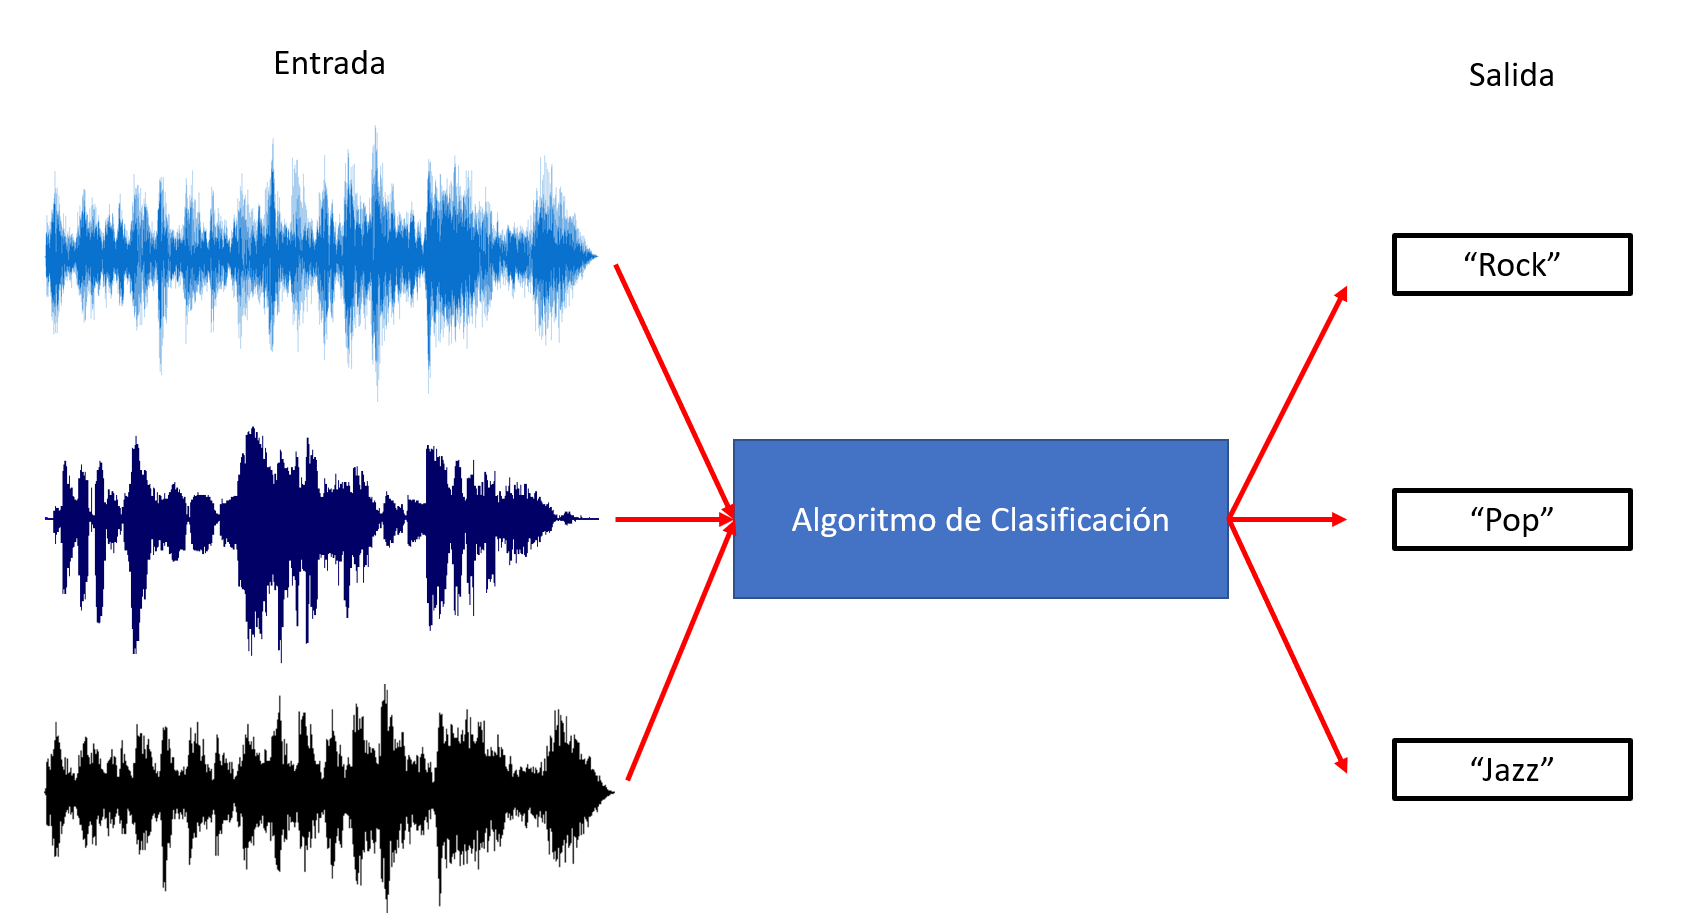

Para construir este modelo usted empleó una base de datos que contiene 700 canciones y anotaciones de sus respectivos géneros. Usted decidió emplear 60% de los datos como conjunto de entrenamiento. Después de construir varios modelos, empleó otro 20% de la base de datos como conjunto de validación para comparar el desempeño de cada uno y definir cuál es el mejor. Ahora usted se dispone a emplear el 20% restante de la base de datos como conjunto de prueba para evaluar la capacidad de generalización de su mejor modelo.

**En esta etapa no debemos preocuparnos por cómo funciona este modelo, pues solo queremos evaluar qué tan bien hace su trabajo.**

Su conjunto de prueba, compuesto por 140 canciones, tiene la siguiente distribución de canciones por género, donde cada género tiene una etiqueta asociada:

| Género | Etiqueta | Cantidad de Canciones |
|--------|----------|-----------------------|
|  Rock  |     1    |           30          |
|  Jazz  |     2    |           20          |
|   Pop  |     3    |           50          |
|   Rap  |     4    |           30          |
|  Salsa |     5    |           10          |

En el archivo `music_data.csv` se encuentran las etiquetas correspondientes a los géneros predichos por su algoritmo para cada canción (columna titulada *prediction*) y las etiquetas correspondientes al género correcto (columna titulada *annotation*).


>**Nota**: Los archivos CSV (*Comma-Separated Values*) son archivos delimitados de texto que separan sus valores mediante comas. Suelen ser empleados para almacenar información tabular. Explore el archivo `music_data.csv` para entender su estructura.


Utilizaremos la librería Pandas para importar este archivo a Python y guardar las predicciones y anotaciones como arreglos de Numpy, lo que nos permitirá calcular las métricas de evaluación de forma sencilla:

## Ejercicio 1:
Realice el contenido de la siguiente función, la cual le entra como parametro la ruta del archivo 'csv' que contiene las anotaciones y predicciones y retorna dos listas con predicciones y anotaciones respectivamente.
### **Notas** 
> - la forma de abrir el archivo es mediante la siguiente linea: *nombre_variable = pd.read_csv('file_name.csv', sep = ",")*
> - *nombre_variable.values* retorna los valores en un arreglo de 2 dimensiones
> - Las predicciones están contenidas en la primera columna (indice 0) y las antoaciones en la segunda columna (indice 1)

In [27]:
import pandas as pd
import numpy as np

def open_csv_data(file_name):
    '''
    file_name: nombre del archivo csv para abrir
    '''
    # YOUR CODE HERE
    data = pd.read_csv(file_name, sep=',')
    predicciones, annotaciones = data['prediction'], data['annotation'] 
    return predicciones, annotaciones


In [28]:
pred, annot = open_csv_data('music_data.csv')
print("Las predicciones de las primeras 5 canciones son: " + str(pred[0:5]))
print("Las anotaciones de las primeras 5 canciones son: " + str(annot[0:5]))
assert(len(pred)==140)
assert(len(annot)==140) 

Las predicciones de las primeras 5 canciones son: 0    1.0
1    1.0
2    3.0
3    3.0
4    3.0
Name: prediction, dtype: float64
Las anotaciones de las primeras 5 canciones son: 0    1.0
1    3.0
2    2.0
3    4.0
4    3.0
Name: annotation, dtype: float64


Una de las métricas más sencillas para evaluar el desempeño de una clasificación es la *exactitud* (en inglés *accuracy*), la cual se calcula como la cantidad de clasificaciones correctas sobre el número total de elementos a clasificar. Podemos encontrar la exactitud asociada a nuestro clasificador de canciones mediante el siguiente fragmento de código:

In [37]:
correctas = np.sum(pred == annot)
totales = len(annot)
exactitud = correctas / totales

print(f"La exactitud de nuestro clasificador es: {exactitud}")


La exactitud de nuestro clasificador es: 0.5928571428571429


Este valor nos dice que en el conjunto de prueba nuestro clasificador acierta en el 59.29% de los casos. Sin embargo, no nos da información acerca del desempeño de cada clase. Puede que tenga un gran desempeño para algunas clases y para otras no. Puede que, por ejemplo, esté clasificando todas las canciones de Rock y de Pop bien, pero falle fatalmente para los otros géneros. Saber esto puede ser útil para encontrar formas de mejorar el modelo.

En primer lugar, centrémonos en analizar una clase de interés, por ejemplo, Jazz. Encontremos su Precisión, Cobertura y F-Medida asociada. Recordemos que, en términos de los errores y aciertos de una clase, podemos expresar estas métricas de la siguiente forma:

\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

\begin{equation}
Cobertura = \frac{TP}{TP + FN}
\end{equation}
    
\begin{equation}
F_{medida} = \frac{2 (P \times C)}{P + C}
\end{equation}

Donde $TP$, $FP$, $FN$, $P$ y $C$ son *True Positives, False Positives, False Negatives,* Precisión y Cobertura respectivamente. 



## **Ejercicio 2:** 
Realice el contenido de la siguiente función, la cual le entra como parametro las anotaciones, predicciones y clase de la cual se quiere calcular las métricas.Esta función retorna las 3 métricas deseadas a partir de dichas variables.


> **Nota**: Probablemente a alguno se le ocurra que una forma de calcular TP, FP y FN es mediante un recorrido de los arreglos `jazz_pred` y `jazz_annot`, contando para cuantos elementos ambos arreglos coincidieron y para cuales fueron distintos. Si bien este proceso es correcto, es supremamente ineficiente en términos computacionales con respecto a ejecutar operaciones matriciales y sumas entre arreglos de Numpy. Por dentro, la librería de Numpy emplea *operaciones vectorizadas* entre los arreglos, las cuales son más eficientes en términos de procesamiento con respecto a realizar un recorrido. Para estos cálculos simples, la diferencia de tiempo de ejecución puede parecer insignificante, pero cuando trabaje con bases de datos más grandes esto se vuelve supremamente relevante.  
**Consejo de vida: Siempre que pueda reemplazar un recorrido por una operación matricial entre arreglos de Numpy, hágalo.**



In [33]:
def prec_rec_fscore(annots,preds,label):
    # YOUR CODE HERE
    tp = np.sum( (annots == label) & (preds == label) )
    fp = np.sum( (annots != label) & (preds == label) )
    fn = np.sum( (annots == label) & (preds != label) )
    precision = tp / (tp+fp)
    cobertura = tp / (tp+fn)
    f_medida = 2*(precision*cobertura)/(precision+cobertura)
    return precision,cobertura,f_medida


In [34]:
precision,cobertura,f_medida = prec_rec_fscore(annot,pred,2)
print("La precision para la clase de Jazz es: " + str(precision))
print("La cobertura para la clase de Jazz es: " + str(cobertura))
print("La F-medida para la clase de Jazz es: " + str(f_medida))
assert(precision==1.0)
assert(cobertura==0.25)
assert(f_medida==0.4)

La precision para la clase de Jazz es: 1.0
La cobertura para la clase de Jazz es: 0.25
La F-medida para la clase de Jazz es: 0.4


¡Muy bien! Ya sabemos cómo calcular varias métricas asociadas a *una* clase. Sin embargo, nos gustaría evaluar el desempeño del algoritmo para *cada* clase. Podríamos simplemente replicar lo que acabamos de hacer 5 veces, pero esto definitivamente puede ser inoficioso cuando trabajemos con bases de datos de muchas clases. Para obtener una mejor idea de cómo se desempeña nuestro algoritmo en las distintas clases podemos calcular la matriz de confusión asociada, cuya estructura ya se fue explicada en el curso.
En el siguiente fragmento de código se propone una posible implementación:

In [39]:
# Encuentra la cantidad de clases que hay en las anotaciones

tags = np.unique(annot)
print(tags)
# Inicializa la matriz de confusión con un arreglo de ceros de tamaño nxn
# donde n es la cantidad de clases en las anotaciones

n = len(tags)
conf_mat_1 = np.zeros((n, n))

# El valor de la casilla (i,j) corresponde a la cantidad de veces que 
# la clase correcta era la i y la clase predicha era la j.

for i in range(n):
    for j in range(n):
        conf_mat_1[i,j] = np.sum((annot == tags[i]) * (pred == tags[j]))
        
print("La matriz de confusion es:")

conf_mat_1

[1. 2. 3. 4. 5.]
La matriz de confusion es:


array([[20.,  0.,  7.,  3.,  0.],
       [ 5.,  5.,  8.,  2.,  0.],
       [10.,  0., 34.,  6.,  0.],
       [ 3.,  0.,  8., 19.,  0.],
       [ 1.,  0.,  1.,  3.,  5.]])

Muchas veces nuestras implementaciones de algoritmos comunes (como obtener una matriz de confusión) son poco eficientes, o incluso idear una implementación requiere de un gran esfuerzo y puede no ser el foco central de nuestro trabajo. Afortunadamente existen librerías con implementaciones eficientes que nos pueden ahorrar este trabajo. A continuación, emplearemos la librería `sklearn` para obtener una matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat_2 = confusion_matrix(annot, pred)

print("La matriz de confusion es:")
conf_mat_2

## Evaluación de Modelos de Detección

La detección es, en general, un problema de clasificación binaria con clases desbalanceadas. Sin embargo, en el campo de la Visión por Computador usualmente la tarea de detección se relaciona con identificar y localizar las instancias de una clase en una imagen (Reflexione acerca de por qué esta es una tarea de clasificación desbalanceada). Por ejemplo, para este punto asuma que usted desarrolló un modelo cuyo objetivo es detectar los teléfonos celulares que se usan en una tribuna para grabar conciertos, como en la siguiente imagen:

![concierto.png](attachment:concierto.png)

Los recuadros verdes representan los celulares que su modelo logró detectar ($TP$), los recuadros rojos son aquellas porciones de la imagen en las que su modelo estableció que había un celular pero en realidad no lo había ($FP$) y los recuadros amarillos son aquellos celulares que su modelo no detectó ($FN$).

Los modelos o algoritmos que se emplean en las tareas de detección suelen tener un *nivel de confianza* asociado. Esto significa que cada posible detección viene acompañada de un número que indica qué tan seguro está el modelo de que sea un positivo. Este número se suele interpretar como una probabilidad y por lo tanto esta entre 0 y 1. En este orden de ideas, para estos modelos se puede variar un *umbral de confianza* a partir del cual los candidatos con un *nivel de confianza* mayor a este umbral son considerados como positivos. Si el umbral es bajo, muchos candidatos serán positivos y probablemente el modelo incurrirá en más falsos positivos. Si el umbral es alto, muchos candidatos serán descartados y probablemente el modelo incurrirá en más falsos negativos. Para evaluar el desempeño general de un modelo de detección para distintos niveles de confianza se suele elaborar una **Curva de Precisión y Cobertura**. En esta curva, cada punto corresponde a un nivel de confianza, y sus coordenadas están dadas por estas dos métricas.

En los archivos `model1.csv`, `model2.csv` y `model3.csv` encontrará los $TP$, $FP$ y $FN$ que obtuvieron 3 modelos en la tarea de detectar celulares en tribunas de conciertos para distintos umbrales de confianza (inspeccione los archivos csv provistos para comprender en mejor medida la información que contienen). A continuación, se presenta un código que permite visualizar las Curvas de Precisión y Cobertura asociadas a los 3 modelos:

In [ ]:
# Se cargan los archivos como DataFrames de Pandas
df1 = pd.read_csv('model1.csv', sep = ",")
df2 = pd.read_csv('model2.csv', sep = ",")
df3 = pd.read_csv('model3.csv', sep = ",")

# Se emplea la función np.split para separar las 4 columnas de cada archivo en vectores independientes.
_, TP1, FP1, FN1 = np.split(df1.values, 4, 1)
_, TP2, FP2, FN2 = np.split(df2.values, 4, 1)
_, TP3, FP3, FN3 = np.split(df3.values, 4, 1)

# Se calculan las precisiones y coberturas de los 3 modelos para los distintos umbrales de confianza.
precisiones = [TP1 / (TP1 + FP1), TP2 / (TP2 + FP2), TP3 / (TP3 + FP3)]
coberturas = [TP1 / (TP1 + FN1), TP2 / (TP2 + FN2), TP3 / (TP3 + FN3)]

# Se crea una visualización de las curvas de precisión y cobertura.

import matplotlib.pyplot as plt
plt.figure()
plt.title("Curvas de Precision y Cobertura")
for i in range(3):
    plt.plot(coberturas[i], precisiones[i], label="Modelo " + str(i+1))
plt.xlabel("Cobertura")
plt.ylabel("Precisión")
plt.grid()
plt.legend()


## Evaluación de Modelos de Segmentación

La tarea de segmentación consiste en localizar todos los píxeles que corresponden a un objeto específico o estructura de interés en una imagen. Los modelos de segmentación retornan una *máscara de segmentación*, la cual corresponde a una imagen donde todos los píxeles que corresponden a una misma clase o instancia de interés tienen una misma intensidad (que se puede interpretar como una etiqueta). Para evaluar la calidad de la segmentación se calcula el Índice de Jaccard entre la máscara de segmentación retornada por el modelo y la anotación provista en la base de datos. Recuerde que el Índice de Jaccard se puede expresar de la siguiente forma:

![jaccard1.png](attachment:jaccard1.png)

donde $A$ y $B$ corresponden a los arreglos binarios asociados a la máscara de segmentación y la anotación.



Suponga que usted desarrolló un modelo que tiene como objetivo segmentar únicamente la cebra más cercana a la cámara en la siguiente foto:

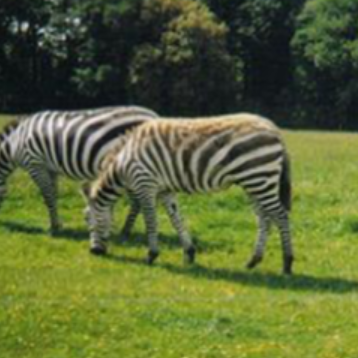


Los archivos `segmentation_mask.png` y `groundtruth.png` corresponden a la máscara de segmentación retornada por su modelo y la anotación que venía con la base de datos respectivamente. A continuación, se presenta un código que permite obtener el Índice de Jaccard asociado a estas dos imagenes:

In [ ]:
from skimage.io import imread

# La función imread nos permite importar la imagen como un arreglo de numpy de dos dimensiones
# al tomar el parámetro as_gray como True

seg_mask = imread("segmentation_mask.png", as_gray = True)
gt = imread("groundtruth.png", as_gray = True)

plt.imshow(seg_mask,cmap='gray')
plt.show()

Note que estas máscaras son binarias, es decir que solo tienen intensidades de 0 o 1:

In [ ]:
print("Las posibles intensidades de la máscara de segmentación son: " + str(np.unique(seg_mask)))
print("Las posibles intensidades de la anotación son: " + str(np.unique(gt)))

## Ejercicio 3

La metrica mas importante para el problema de segmentación es el indice de Jaccard, tambien conocido como intersección sobre union. Debe realizar una función que logre encontrar esta metrica dadas 2 imagenes binarias. Puede asumir que estás serán siempre arrays de numpy.
> **consejo:** recuerde que siempre será mas efectivo computacionalmente hacer operaciones entre arreglos que hacer recorridos, tenga esto en cuenta al momento de realizar su función. Tambien recuerde no agregar 2 veces la intersección al momento de calcular la union.

In [ ]:
# Cálculo del Índice de Jaccard
def jaccard(mask1,mask2):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
print("El Índice de Jaccard entre ambas máscaras es: " + str(jaccard(seg_mask,gt)))
assert(np.isclose(0.33181,jaccard(seg_mask,gt)))

A continuación se presentará una visualización de la imagen original, la máscara de segmentación, la anotación, la intersección y la unión:

In [ ]:
# Importamos la imagen original como una imagen a color

original = imread('original.png')

# Creamos dos listas con las imagenes a visualizar y sus correpondientes títulos para 
# generar un subplot de forma más condensada. Note que los arreglos interseccion y union
# previamente definidos eran de caracter booleano, por lo que para visualizarlos hay que
# transformarlos en arreglos de 0s y 1s, lo cual se puede hacer mediante el método .astype()
# de los arreglos de Numpy.

imagenes = [original, seg_mask, gt, interseccion.astype(int), union.astype(int)]
titulos = ["Imagen Original", "Máscara de Segmentación", "Anotación", "Intersección", "Unión"]

# Se genera la visualización

plt.figure(figsize=(30,20))
for i in range(len(imagenes)):
    plt.subplot(151 + i)
    plt.title(titulos[i], fontdict={"fontsize":20})
    if i != 0:
        plt.imshow(imagenes[i], cmap='gray')
    else:
        plt.imshow(imagenes[i])
    plt.axis("Off")

## Créditos ##

### Realizado por:
Danniel Moreno - Jose Miguel Abril Nova
### Supervisado por:
Felipe Escallón Páez - Jose Miguel Abril Nova

2022